# 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/raw/Student_performance_data _.csv')
print(df.columns.to_list())

['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [3]:
# Eyeball for possible outliers
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
# Check for null values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
# Drop non-significant columns
df = df.drop(['StudentID', 'GradeClass', 'Ethnicity'], axis=1)

In [6]:
df.head(5)

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061


In [7]:
# Translate GPA to risk levels
def to_risk(gpa):
    if gpa >= 3.0:
        return '0'

    elif 2.5 <= gpa < 3.0:
        return '1'

    elif 2.0 <= gpa < 2.5:
        return '2'

    elif gpa < 2.5:
        return '3'

In [8]:
df['RiskLevel'] = df['GPA'].apply(to_risk)

In [9]:
X = df[['Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport', 'ParentalEducation', 
        'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]

y = df['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
df.head(5)

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,RiskLevel
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,1
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,0
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,3
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,2
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,3


# 2. Data Visualisation

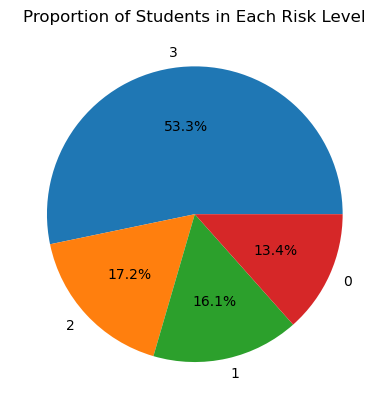

In [11]:
counts = df['RiskLevel'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Proportion of Students in Each Risk Level')
plt.show()

Students at Risk Level 3 (Very High) covers over 50% of the total, indicating class imbalance. This means we have to make sure classes are treated equally in model training later to .

# 3. Model Training

In [12]:
# Scale features to ensure same scale (reduced bias)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

## 3.1 Random Forest Classifier

In [13]:
# Hyperparameter tuning
clf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=8,
    min_samples_leaf=2,
    random_state=42,
    max_features='sqrt',
    criterion = 'gini',
    class_weight = 'balanced'
)

clf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=1000, random_state=42)

In [14]:
y_pred_clf = clf.predict(X_test_scaled)

In [15]:
# Generate classification report
print('\n------------------------Random Forest------------------------')
print(classification_report(y_test, y_pred_clf, zero_division=0))


------------------------Random Forest------------------------
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        65
           1       0.60      0.61      0.61        80
           2       0.59      0.67      0.63        85
           3       0.94      0.90      0.92       249

    accuracy                           0.79       479
   macro avg       0.72      0.73      0.73       479
weighted avg       0.80      0.79      0.79       479



## 3.2 SVM

In [16]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [17]:
y_pred_svm = svm_model.predict(X_test_scaled)

print('--------------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred_svm, zero_division=0))

--------------------------- SVM ----------------------------
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        65
           1       0.62      0.62      0.62        80
           2       0.56      0.54      0.55        85
           3       0.90      0.94      0.92       249

    accuracy                           0.78       479
   macro avg       0.73      0.71      0.71       479
weighted avg       0.78      0.78      0.78       479



## 3.3 Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight = 'balanced'
)
reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
y_pred_reg = reg.predict(X_test_scaled)

print('--------------------------- Logistic Regression ----------------------------')
print(classification_report(y_test, y_pred_reg, zero_division=0))

--------------------------- Logistic Regression ----------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        65
           1       0.71      0.70      0.70        80
           2       0.62      0.75      0.68        85
           3       0.97      0.89      0.92       249

    accuracy                           0.83       479
   macro avg       0.78      0.80      0.78       479
weighted avg       0.84      0.83      0.83       479



## 3.4 Choose Best Model

Out of the three models, logistic regression performed best. It achieved an overall accuracy of 0.83, outperforming Random Forest Classifier (0.79) and SVM (0.78). Most importantly, it produced the highest recall for students at Risk Levels 2 (High) and 3 (Very High), which is the most critical metric for early-risk intervention. Prioritising recall ensures that the maximum number of at-risk students (True Positives) are correctly identified for timely support. Furthermore, it also achieved the highest weighted average for precision (0.84) and f1-score (0.83), making it the best suited model for risk level predictions.

# 4 Export

## 4.1 Model and Scaler to use in Streamlit

In [20]:
joblib.dump(reg, 'student_risk_model.pkl')

['student_risk_model.pkl']

In [21]:
# Export scaler to scale user input features
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## 4.2 Export cleaned data 

In [24]:
df.to_csv("data/cleaned/student_performance_data_cleaned.csv", index=False)